# Hypothesis Tests
## Name: Brshank Singh Negi
## Roll No: I032
## B.Tech AI
# **EXPT 10**

AIM:
1. Outlier Detection using Z-score / Z-test
2. Use T-test for testing/comparing the means of two samples if they belong to the same population

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import seaborn as sns
# warnings.filterwarnings('ignore')

In [2]:
mu,sigma=30,5
s=np.random.normal(mu,sigma,100)
print(s)


[30.42032727 26.03872338 27.20613818 27.44613742 27.38335145 34.00316364
 32.59179506 33.88525762 35.07131616 25.34958319 35.58142526 45.54273783
 29.7413313  27.56828247 33.1936292  23.14339084 34.27033154 32.2119397
 26.86063655 18.38906572 35.61965004 37.53211203 27.4350012  18.66811283
 29.9036721  29.03163484 27.10909821 27.05872888 35.51473969 29.4928638
 24.78260539 41.24501894 28.50280736 27.80651268 34.47672838 22.63638629
 26.97204476 31.53486761 29.29597793 28.78827638 29.72911569 27.57998451
 21.58766262 28.97361603 32.88198895 32.08300756 23.78756656 36.61689847
 24.35210794 26.30952439 23.95880811 30.37804594 28.2514248  26.39791819
 30.67677931 25.28693566 27.8275355  32.45366459 27.420808   28.92178025
 30.75334012 33.78653953 28.29989612 29.02437283 29.25394362 28.21078962
 27.44564481 28.00508528 29.57490795 36.52933399 26.46945954 29.67713042
 32.81606854 30.56190218 33.39335899 32.4402266  35.82950618 28.90781347
 29.6836039  31.49887861 32.44612603 31.44011341 29.6

(array([ 2.,  5., 14., 27., 21., 19.,  8.,  2.,  1.,  1.]),
 array([18.38906572, 21.10443293, 23.81980014, 26.53516735, 29.25053457,
        31.96590178, 34.68126899, 37.3966362 , 40.11200341, 42.82737062,
        45.54273783]),
 <BarContainer object of 10 artists>)

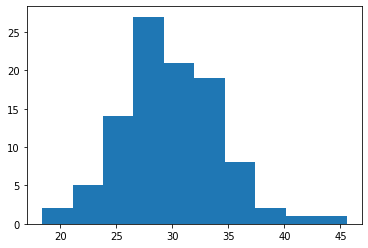

In [3]:
plt.hist(s)

In [4]:
s[85]=120
s[15]=10

In [5]:
np.max(s)

120.0

In [6]:
np.min(s)

10.0

In [7]:
df=pd.DataFrame(s,columns=['Data'])

In [8]:
df

,Data
0,30.420327
1,26.038723
2,27.206138
3,27.446137
4,27.383351
...,...
95,21.586685
96,27.553559
97,25.023376
98,31.316920


In [9]:
for col in df.columns:
    col_zscore=col+'_zscore'
    df[col_zscore]=(df[col]-df[col].mean())/df[col].std(ddof=0)

In [10]:
df['Data_zscore']=(df['Data']-df['Data'].mean())/df[col].std(ddof=0)

In [11]:
df['outlier']=(abs(df['Data_zscore']) >1.95 ).astype(int)

In [12]:
df.loc[df.outlier==1]

,Data,Data_zscore,outlier
15,10.0,-2.019125,1
85,120.0,8.775786,1


In [13]:
x=int(input('Enter weight of 10 yr old='))

Enter weight of 10 yr old=15


In [14]:
meann=df['Data'].mean()
meann

30.574859728556913

In [15]:
stdd=df[col].std(ddof=0)
stdd

10.189986860654875

In [16]:
abs((x-meann)/stdd)

1.5284474790339397

In [17]:
if (abs((x-meann)/stdd) >1.95):
    print('this is an Outlier for X=',x,)
else:
    print('Reject H0:',x,' is not an Outlier')

Reject H0: 15  is not an Outlier


# 3 Use T-test for testing comparing the meansa of two samples if t they belong to the same population


## H0= Same Distro
## H1= Different Distro


In [18]:
np.random.seed(8)

In [19]:
s1_sales=np.random.randint(1500,3000,100)
s1_sales

array([1951, 2864, 1861, 1633, 2486, 1636, 2351, 2884, 1548, 2609, 2328,
       1615, 1958, 2167, 2120, 1769, 2585, 1643, 2873, 2878, 2839, 1770,
       2626, 1849, 1940, 2277, 2063, 2464, 2449, 2327, 1670, 1910, 1822,
       2533, 2905, 1994, 2605, 1847, 1991, 2075, 2098, 2555, 2544, 2185,
       2033, 2212, 2488, 1528, 2235, 2059, 2918, 2441, 2526, 1922, 1699,
       2647, 2900, 2741, 2464, 2817, 2887, 1950, 2990, 2834, 1923, 2134,
       2570, 1851, 2684, 2341, 2494, 1507, 2906, 2917, 2242, 1926, 1519,
       2327, 1804, 2028, 1612, 1706, 1618, 2261, 2451, 2256, 1605, 2288,
       2772, 1598, 2739, 2750, 1506, 2267, 2936, 2334, 2159, 1983, 2599,
       2791])

In [20]:
s2_sales=np.random.randint(500,1500,50)
s2_sales

array([ 674,  720,  956, 1451,  973, 1410, 1179, 1411,  647, 1070, 1372,
       1380,  881,  875,  880, 1055, 1027,  528, 1111, 1428,  669,  644,
       1086,  661,  993, 1462,  954, 1202, 1019, 1351, 1276,  918, 1309,
       1441,  650, 1216,  976,  841, 1061,  919, 1169, 1297, 1248,  692,
       1060, 1200,  684, 1466,  923,  780])

/home/brshank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/brshank/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'sales prices  '),
 Text(0, 0.5, 'probability value'),
 Text(0.5, 1.0, 'prob. distribution')]

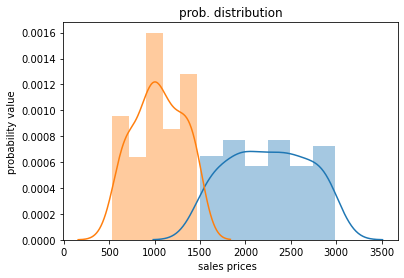

In [21]:
ax=sns.distplot(s1_sales)
ax.set(xlabel='sales prices ',ylabel='probability value',title='prob. distribution')
ax=sns.distplot(s2_sales)
ax.set(xlabel='sales prices  ',ylabel='probability value',title='prob. distribution')

In [22]:
from scipy.stats import ttest_ind
#alpha = 1- confidence 
def compare_2_Sales(arr1,arr2,alpha,sample_size):
    stats,p = ttest_ind(arr1,arr2)
    if p>alpha:
        print('H0:Accept for ', 100*(1-alpha),'"%" confidence == Same Distribution')
    else:
        print('H1: Reject for ', 100*(1-alpha),'"%" confidence == Different Distribution')

In [23]:
sample_size=15
s1_sample=np.random.choice(s1_sales,sample_size)
s2_sample=np.random.choice(s2_sales,sample_size)

In [24]:
perc_confidence=int(input('Enter Confidence %='))
alpha=1-(perc_confidence/100)
compare_2_Sales(s1_sample,s2_sample,alpha,sample_size)


Enter Confidence %=95
H1: Reject for  95.0 "%" confidence == Different Distribution


# Conclusion=
### WE STUDIED ABOUT THE ZTESTS AND HYPOTHESIS TESTING 
## Took some Real Life examples and implemented the z test 